In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Konfigurace vizualizace dat
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
matplotlib.style.use('ggplot')
pd.options.display.max_rows = 15

In [69]:
from IPython.display import clear_output
dataset = "../test/fixtures/kun{01,03,04,05,08,10,12}.txt"
print('Compiling...')
!cd ..; make dev > /dev/null 2> /dev/null
print('Calculating sequential pass...')
!../bin/pdpjes-seq {dataset} > /tmp/pdpjes-results-seq.csv
print('Calculating parallel pass...')
!../bin/pdpjes {dataset} > /tmp/pdpjes-results-parallel.csv
print('Done.')

Compiling...
Calculating sequential pass...
Calculating file 7/7
Calculating parallel pass...
-!- OpenMP ready. 8 CPUs available, 8 threads available on 0 available devices.
Calculating file 7/7
Done.


In [70]:
parallel = pd.read_csv('/tmp/pdpjes-results-parallel.csv')
sequential = pd.read_csv('/tmp/pdpjes-results-seq.csv')

elapsed = pd.DataFrame({
    '0 Test File': sequential['filename'],
    '1 Parallel': parallel['elapsed'],
    '2 Sequential': sequential['elapsed'],
    '3 Sequential vs Parallel': sequential['elapsed'] - parallel['elapsed']
})

elapsed

,0 Test File,1 Parallel,2 Sequential,3 Sequential vs Parallel
0,../test/fixtures/kun01.txt,0.011028,0.026367,0.015339
1,../test/fixtures/kun03.txt,0.117410,2.529960,2.412550
2,../test/fixtures/kun04.txt,0.103983,0.051041,-0.052942
3,../test/fixtures/kun05.txt,0.108807,0.051538,-0.057269
4,../test/fixtures/kun08.txt,0.117922,2.626500,2.508578
5,../test/fixtures/kun10.txt,3.652720,14.535000,10.882280
6,../test/fixtures/kun12.txt,6.237090,21.780600,15.543510


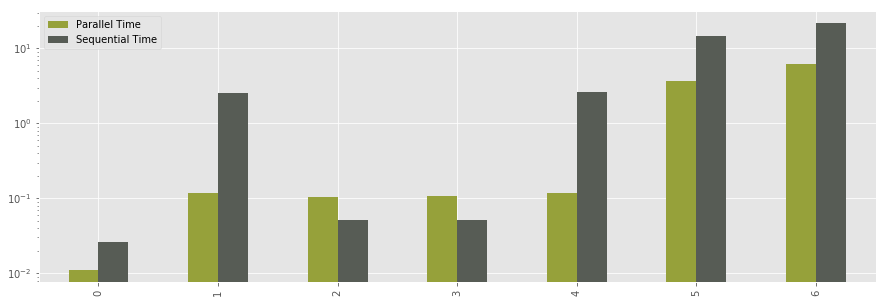

In [71]:
comparison = pd.DataFrame({
    'Sequential Time': sequential['elapsed'],
    'Parallel Time': parallel['elapsed']
})

ax = comparison.plot(kind='bar', color=['#96A13A','#575C55'])
ax.set_yscale('log', nonposy='clip')

In [72]:
iterations = pd.DataFrame({
    '0 Test File': sequential['filename'],
    '1 Parallel Scheme': parallel['iterations'],
    '2 Sequential Scheme': sequential['iterations'],
    '3 Sequential vs Parallel': sequential['iterations'] - parallel['iterations']
})

iterations

,0 Test File,1 Parallel Scheme,2 Sequential Scheme,3 Sequential vs Parallel
0,../test/fixtures/kun01.txt,42601,30606,-11995
1,../test/fixtures/kun03.txt,507030,2984057,2477027
2,../test/fixtures/kun04.txt,455536,59563,-395973
3,../test/fixtures/kun05.txt,474790,59563,-415227
4,../test/fixtures/kun08.txt,513173,2943943,2430770
5,../test/fixtures/kun10.txt,13701618,15544085,1842467
6,../test/fixtures/kun12.txt,17083813,21814977,4731164


In [73]:
!rm /tmp/pdpjes*